In [1]:
import pandas as pd

In [2]:
houses = pd.read_csv('AmesHousing.csv')

## 1. The Range

In [3]:
def find_range(array):
    return max(array) - min(array)

range_by_year = {}
for year in houses['Yr Sold'].unique():
    data_by_year = houses[houses['Yr Sold'] == year]
    range_by_year[year] = find_range(data_by_year['SalePrice'])

range_by_year

{2010: 598868, 2009: 575100, 2008: 601900, 2007: 715700, 2006: 590000}

## 2. The Average Distance

In [4]:
C = [1,1,1,1,1,1,1,1,1,21]
def average_distance(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        distances.append(value - reference_point)
        
    return sum(distances) / len(distances)

avg_distance = average_distance(C)
avg_distance

0.0

## 3. Mean Absolute Deviation

In [5]:
C = [1,1,1,1,1,1,1,1,1,21]
def mean_absolute_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        absolute_distance = abs(value - reference_point)
        distances.append(absolute_distance)
        
    return sum(distances) / len(distances)

mad = mean_absolute_deviation(C)
mad

3.6

## 4. Variance

In [6]:
C = [1,1,1,1,1,1,1,1,1,21]
def variance(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    return sum(distances) / len(distances)

variance_C = variance(C)
variance_C

36.0

## 5. Standard Deviation

In [7]:
from math import sqrt
C = [1,1,1,1,1,1,1,1,1,21]
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

standard_deviation_C = standard_deviation(C)
standard_deviation_C

6.0

## 6. Average Variability Around the Mean

In [8]:
print(standard_deviation(houses['SalePrice']))

79873.05865192247


In [9]:
print(houses['SalePrice'].mean())

180796.0600682594


In [10]:
import matplotlib.pyplot as plt

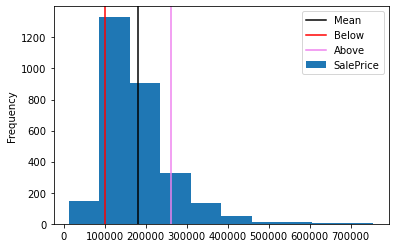

In [11]:
mean = houses['SalePrice'].mean()
st_dev = standard_deviation(houses['SalePrice'])
houses['SalePrice'].plot.hist()
plt.axvline(mean, color = 'Black', label = 'Mean')
plt.axvline(mean - st_dev, color = 'Red', label = 'Below')
plt.axvline(mean + st_dev, color = 'Violet', label = 'Above')
plt.legend()

In [12]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)
# Measuring first the variability for each year
years = {}

for year in houses['Yr Sold'].unique():
    year_segment = houses[houses['Yr Sold'] == year]
    st_dev = standard_deviation(year_segment['SalePrice'])
    years[year] = st_dev

# Getting years of max and min variability
greatest_variability = max(years, key = years.get) # outputs directly the year with the maximum variability
lowest_variability = min(years, key = years.get) # outputs directly the year with the minimum variability

In [13]:
years

{2010: 74521.920711871,
 2009: 80794.39070298373,
 2008: 75531.94622558328,
 2007: 82483.28433288915,
 2006: 82553.57563561267}

In [14]:
greatest_variability

2006

In [15]:
lowest_variability

2010

## 7. A Measure of Spread

In [16]:
for i in range(1,5):
    sample = houses['SalePrice'].sample(50, random_state = i)
    st_dev = standard_deviation(sample)
    print('Sample ' + str(i) + ': ' + str(st_dev))

Sample 1: 81785.0811515768
Sample 2: 100370.62998094413
Sample 3: 60676.038515710636
Sample 4: 64436.40016450328


In [17]:
sample1 = houses['Year Built'].sample(50, random_state = 1)
sample2 = houses['Year Built'].sample(50, random_state = 2)

st_dev1 = standard_deviation(sample1)
st_dev2 = standard_deviation(sample2)

In [18]:
st_dev1

29.239589600403075

In [19]:
st_dev2

32.466234767832255

## 8. The Sample Standard Deviation

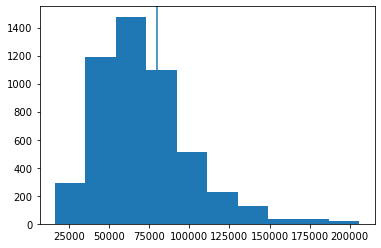

In [20]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
    
plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']))
plt.show()

## 9. Bessel's Correction

In [21]:
print(sum(st_devs) / 5000) #st_devs - a list with all the 5000 st. deviations

71303.64762671624


In [22]:
print(standard_deviation(houses['SalePrice']))

79873.05865192247


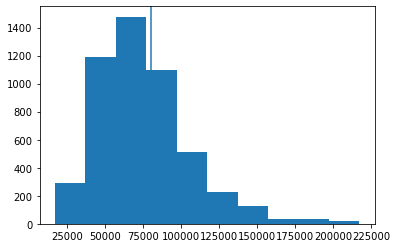

In [23]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / (len(distances) - 1)
    
    return sqrt(variance)

st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
    
plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']))
plt.show()

## 10. Standard Notation

In [24]:
import numpy as np

In [26]:
sample = houses.sample(100, random_state = 1)

pandas_stdev = sample['SalePrice'].std(ddof = 1) # default ddof = 1
numpy_stdev = np.std(sample['SalePrice'], ddof = 1) # default ddof = 0
equal_stdevs = pandas_stdev == numpy_stdev

pandas_var = sample['SalePrice'].var(ddof = 1) # default ddof = 1
numpy_var = np.var(sample['SalePrice'], ddof = 1) #default ddof = 0
equal_vars = pandas_var == numpy_var
equal_vars

True

## 11. Sample Variance — Unbiased Estimator

In [28]:
population = [0, 3, 6]

samples = [[0,3], [0,6],
           [3,0], [3,6],
           [6,0], [6,3]
          ]
from numpy import var, std

pop_var = var(population, ddof = 0)
pop_std = std(population, ddof = 0)

st_devs = []
variances = []

for sample in samples:
    st_devs.append(std(sample, ddof = 1))
    variances.append(var(sample, ddof = 1))
    
mean_std = sum(st_devs) / len(st_devs)
mean_var = sum(variances) / len(variances)

In [30]:
equal_stdev = pop_std == mean_std
equal_stdev

False

In [31]:
equal_var = pop_var == mean_var
equal_var

False